In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pickle

In [18]:
def open_pickle_file(filename):
    with open(filename, 'rb') as file:
        try:
            return pickle.load(file)
        except Exception:
            print(f"pickle.load of {filename} ended with an exception")
            raise
            
def save_pickle_file(object_to_save, filename):
    with open(filename, 'wb') as file:
        pickle.dump(object_to_save, file)

def get_nearest_neighbours(curr_location, N):
    #periodic boundary conditions
    x = curr_location[0]
    y = curr_location[1]
    if x==0:
        first_neighbor = (N-1, y)
    else:
        first_neighbor = (x-1, y)
    if y == 0:
        second_negihbor = (x, N-1)
    else:
        second_negihbor = (x, y-1)
    if x == N-1:
        third_neighbor = (0, y)
    else:
        third_neighbor = (x+1, y)
    if y == N-1:
        fourth_neighbor = (x, 0) 
    else:
        fourth_neighbor = (x, y+1) 
    return [first_neighbor, second_negihbor, third_neighbor, fourth_neighbor]


In [3]:
def plot_epidemic_state(lattice):
    colormaps = [ListedColormap(["darkorange", "gold", "lawngreen"])]
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                                constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
            psm = ax.pcolormesh(lattice, cmap=cmap, rasterized=True, vmin=0, vmax=2)
            fig.colorbar(psm, ax=ax)
    plt.show()

In [5]:
def get_suspected_lattice(N, c):
    lattice = np.full((N, N), S)
    I_sites = []
    a = np.random.randint(0, N)
    b = np.random.randint(0, N)
    first_site = (a,b)
    I_sites.append(first_site)
    lattice[first_site[0]][first_site[1]] = I
    i = 0
    r_number = 0
    while len(I_sites)!=0:
        if 0== len(I_sites)-1:
        # if only one infected then we choose him
            idx = 0
        else:
            idx= np.random.randint(0, len(I_sites)-1)
        #idx of infected on the lattice
        idxs = I_sites[idx]
        if np.random.random()<=c:
            lattice[idxs[0]][idxs[1]] = R
            r_number += 1
            #when infected became recovered then remove him from infected ones index list
            del I_sites[idx]
        else:
            #define nearest negihvours
            neighbours = get_nearest_neighbours(idxs, N)
            neighbours_idx = np.random.randint(0,4)
            neighbour_idx = neighbours[neighbours_idx]
            neighbour = lattice[neighbour_idx[0]][neighbour_idx[1]]
            if neighbour == S:
                lattice[neighbour_idx[0]][neighbour_idx[1]] = I
                I_sites.append(neighbour_idx)
        i += 1
        if  i% 20 ==0 and False:
            plot_epidemic_state(lattice)
#     recovered_numbers = get_recovered_number(lattice)
#     plot_epidemic_state(lattice)
#     plt.close()
#     ratios = get_recovered_ratios(lattice)
    
    return lattice, r_number
  
#not used
def get_recovered_ratios(lattice):
    R_sum = 0.0
    R_squared_sum = 0.0
    for row in lattice:
        value = len(np.where(row==R)[0])
        R_sum += value
        R_squared_sum += value**2
    lattice_size = float(lattice.size)
    return R_sum/  lattice_size, R_squared_sum/lattice_size

def get_recovered_ratio(lattice):
    R_sum = 0.0
    for row in lattice:
        R_sum += len(np.where(row==R)[0])
    return R_sum/  float(lattice.size)

In [27]:
#define nearest neighbors - boundary conditions
S = 0
I = 1
R = 2
step = 20
Ls = [64]
L_values = []
cs = np.linspace(0.15, 0.2, step)
for idx, L in enumerate(Ls):
# r_values = np.empty(step, float)
# u_values = np.empty(step, float)
    for i in range(step):
        c = cs[i]
        K = 100
        recovered = []
        for _ in range(K):
            lattice, recovered_numbers = get_suspected_lattice(L, c)
            recovered.append(recovered_numbers)
        recovered = np.array(recovered)
        
        u = np.mean(recovered**2)/(np.mean(recovered))**2
        ro = np.mean(recovered)/L**2
        L_values.append((recovered , L**2,u,ro))
        print(f"next value calculated for density: {ro}"
              f", next value u: {u}")

next value calculated for density: 0.68005126953125, next value u: 1.333680956180294
next value calculated for density: 0.7236767578125, next value u: 1.2498312042778361
next value calculated for density: 0.59870849609375, next value u: 1.471555428860276
next value calculated for density: 0.663095703125, next value u: 1.3322281981599169
next value calculated for density: 0.61586669921875, next value u: 1.3891435542935555
next value calculated for density: 0.5878125, next value u: 1.445575538167771
next value calculated for density: 0.47652099609375, next value u: 1.7129813190592336
next value calculated for density: 0.547919921875, next value u: 1.464445875061365
next value calculated for density: 0.472236328125, next value u: 1.6546926581148027
next value calculated for density: 0.46975341796875, next value u: 1.5893545446232191
next value calculated for density: 0.383154296875, next value u: 1.9115032756014658
next value calculated for density: 0.34034912109375, next value u: 1.99618

In [28]:
L_array = np.array(L_values).transpose()
U = L_array[2]
Ro = L_array[3]

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


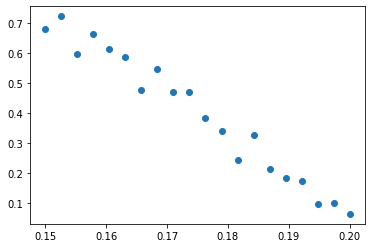

In [29]:
plt.plot(cs, Ro, 'o')

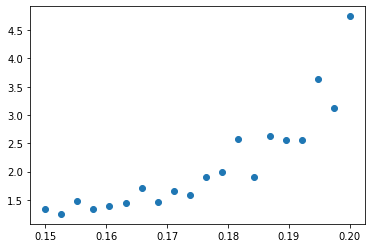

In [30]:
plt.plot(cs, U, 'o')

In [ ]:
L_array = np.array(L_values).transpose()
U = L_array[2]
Ro = L_array[3]

In [32]:
files = "files"
save_pickle_file(L_array, os.path.join(files, "L_64.pkl"))

In [44]:
#define nearest neighbors - boundary conditions
S = 0
I = 1
R = 2
step = 20
Ls = [256]
L_values = []
cs = np.linspace(0.15, 0.2, step)
for idx, L in enumerate(Ls):
# r_values = np.empty(step, float)
# u_values = np.empty(step, float)
    for i in range(step):
        c = cs[i]
        K = 100
        recovered = []
        for _ in range(K):
            lattice, recovered_numbers = get_suspected_lattice(L, c)
            recovered.append(recovered_numbers)
        recovered = np.array(recovered, dtype=np.uint64)
        
        u = np.mean(recovered**2)/(np.mean(recovered))**2
        ro = np.mean(recovered)/L**2
        L_values.append((recovered , L**2,u,ro))
        print(f"next value calculated for density: {ro}"
              f", next value u: {u}")

next value calculated for density: 0.6824468994140624, next value u: 1.3333109148125222
next value calculated for density: 0.6834568786621094, next value u: 1.3157493221574235
next value calculated for density: 0.5516481018066406, next value u: 1.6124394061557286
next value calculated for density: 0.5875070190429688, next value u: 1.492651695594065
next value calculated for density: 0.5864002990722657, next value u: 1.4705159368861302
next value calculated for density: 0.5317079162597657, next value u: 1.586590755494601
next value calculated for density: 0.5671591186523437, next value u: 1.449307891293103
next value calculated for density: 0.4830210876464844, next value u: 1.6399580646465117
next value calculated for density: 0.4076274108886719, next value u: 1.852316067853545
next value calculated for density: 0.30968643188476563, next value u: 2.2388786865634374
next value calculated for density: 0.3222624206542969, next value u: 1.902150683601684
next value calculated for density: 0

In [46]:
L_array = np.array(L_values).transpose()
U = L_array[2]
Ro = L_array[3]

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


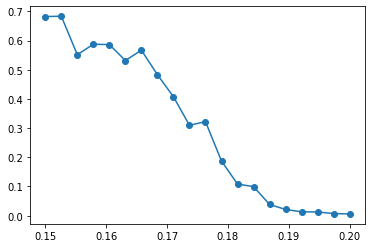

In [51]:
plt.plot(cs, Ro, 'o-')

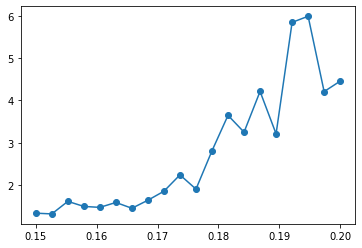

In [50]:
plt.plot(cs, U, 'o-')

In [52]:
files = "files"
save_pickle_file(L_array, os.path.join(files, "L_256.pkl"))

In [53]:
#define nearest neighbors - boundary conditions
S = 0
I = 1
R = 2
step = 20
Ls = [512]
L_values = []
cs = np.linspace(0.15, 0.2, step)
for idx, L in enumerate(Ls):
# r_values = np.empty(step, float)
# u_values = np.empty(step, float)
    for i in range(step):
        c = cs[i]
        K = 100
        recovered = []
        for _ in range(K):
            lattice, recovered_numbers = get_suspected_lattice(L, c)
            recovered.append(recovered_numbers)
        recovered = np.array(recovered, dtype=np.uint64)
        
        u = np.mean(recovered**2)/(np.mean(recovered))**2
        ro = np.mean(recovered)/L**2
        L_values.append((recovered , L**2,u,ro))
        print(f"next value calculated for density: {ro}"
              f", next value u: {u}")

next value calculated for density: 0.5914678192138672, next value u: 1.5383864434539753
next value calculated for density: 0.6475732421875, next value u: 1.388871586737577
next value calculated for density: 0.6751603317260743, next value u: 1.3157658297027517
next value calculated for density: 0.639543571472168, next value u: 1.3698548118736686
next value calculated for density: 0.6200626373291016, next value u: 1.3887682535659283
next value calculated for density: 0.5990946197509766, next value u: 1.4083211513169
next value calculated for density: 0.6822730255126953, next value u: 1.204900148775608
next value calculated for density: 0.4910766220092773, next value u: 1.612715510356693
next value calculated for density: 0.4216670608520508, next value u: 1.786560655937576
next value calculated for density: 0.352064208984375, next value u: 1.9907492127804205
next value calculated for density: 0.27947364807128905, next value u: 2.142877863143374
next value calculated for density: 0.1340306

In [54]:
L_array = np.array(L_values).transpose()
U = L_array[2]
Ro = L_array[3]


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


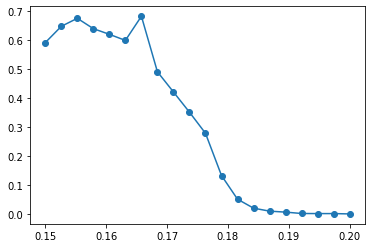

In [55]:
plt.plot(cs, Ro, 'o-')

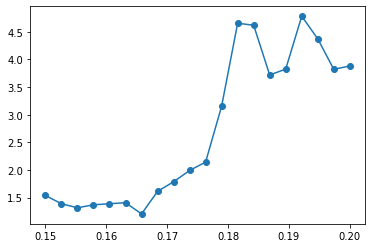

In [56]:
plt.plot(cs, U, 'o-')

In [57]:
save_pickle_file(L_array, os.path.join(files, "L_512.pkl"))

In [68]:
#define nearest neighbors - boundary conditions
S = 0
I = 1
R = 2
step = 20
Ls = [16]
L_values = []
cs = np.linspace(0.15, 0.2, step)
for idx, L in enumerate(Ls):
# r_values = np.empty(step, float)
# u_values = np.empty(step, float)
    for i in range(step):
        c = cs[i]
        K = 1000
        recovered = []
        for _ in range(K):
            lattice, recovered_numbers = get_suspected_lattice(L, c)
            recovered.append(recovered_numbers)
        recovered = np.array(recovered, dtype=np.uint64)
        
        u = np.mean(recovered**2)/(np.mean(recovered))**2
        ro = np.mean(recovered)/L**2
        L_values.append((recovered , L**2,u,ro))
        print(f"next value calculated for density: {ro}"
              f", next value u: {u}")

next value calculated for density: 0.70681640625, next value u: 1.298990933733496
next value calculated for density: 0.69369140625, next value u: 1.3176270132123353
next value calculated for density: 0.65826953125, next value u: 1.3701345649995413
next value calculated for density: 0.63516015625, next value u: 1.4034821068089196
next value calculated for density: 0.65375390625, next value u: 1.353580479304625
next value calculated for density: 0.63804296875, next value u: 1.3808710424379895
next value calculated for density: 0.5903203125, next value u: 1.4650166712186954
next value calculated for density: 0.564921875, next value u: 1.5033589092400361
next value calculated for density: 0.5828515625, next value u: 1.4522681417352892
next value calculated for density: 0.55353515625, next value u: 1.5091989859652057
next value calculated for density: 0.53678125, next value u: 1.5294413913071465
next value calculated for density: 0.506390625, next value u: 1.6067488653740434
next value calc

In [69]:
L_array = np.array(L_values).transpose()
U = L_array[2]
Ro = L_array[3]



c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


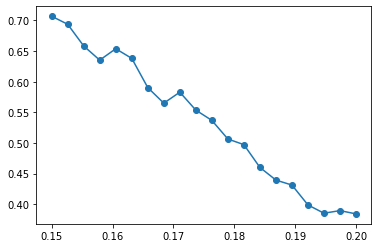

In [70]:
plt.plot(cs, Ro, 'o-')

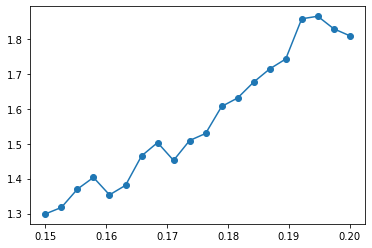

In [71]:
plt.plot(cs, U, 'o-')

In [72]:
save_pickle_file(L_array, os.path.join(files, "L_16.pkl"))

In [73]:
u = np.mean(recovered**2)/(np.mean(recovered))**2

In [43]:
recovered**2

array([-870962071, -771357696, -707915632,        121, -799319920,
       -805347967, -736964095,          1, -749002992, -835998327,
                1, -718568487, -879733696, -866630592, -733264896,
       -805229820,          4, -818331927,          1,          1,
       -901788295,          1,      16641, -796836271, -852798396,
             3844, -767913975,        169, -805111671, -831644796,
       -871196127, -820572160, -865459452, -830232252,          1,
       -747573696,          4, -911451072, -851976967, -809954140,
       -823283055, -784286295], dtype=int32)

In [42]:
np.mean(recovered**2)

-580254427.3571428

In [ ]:
L_array = np.array(L_values).transpose()
U = L_array[2]
Ro = L_array[3]

## Finite scalling

In [79]:
c = 0.1764

In [80]:
Ls = [16,32,64,128,256,512]

In [84]:
S = 0
I = 1
R = 2
P = []
S_ = []
for L in Ls:
    K = 100
    recovered = []
    for _ in range(K):
        lattice, recovered_numbers = get_suspected_lattice(L, c)
        recovered.append(recovered_numbers)
    recovered = np.array(recovered, dtype=np.uint64)
    r_c = np.mean(recovered)
    S_.append(r_c)
    ro = r_c/L**2
    P.append(ro)
    print(r_c, ro)

135.77 0.5303515625
500.4 0.488671875
1778.73 0.43426025390625
5787.39 0.3532342529296875
18674.65 0.28495254516601565
68215.84 0.2602227783203125


In [85]:
ln_l = np.log(np.array(Ls))

In [86]:
ln_s = np.log(np.array(S_))

In [87]:
ln_p = np.log(np.array(P))

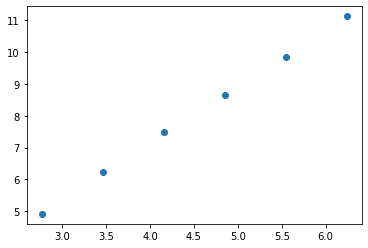

In [89]:
plt.plot(ln_l, ln_s, 'o')

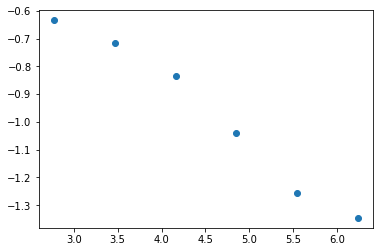

In [91]:
plt.plot(ln_l, ln_p, 'o')

In [93]:
save_pickle_file((np.array(Ls), np.array(S_), np.array(P)), "p_versus_l.pkl")

In [94]:
pkl_ratio_files = ["L_16.pkl", "L_32.pkl","L_64.pkl","L_128.pkl","L_256.pkl","L_512.pkl"]

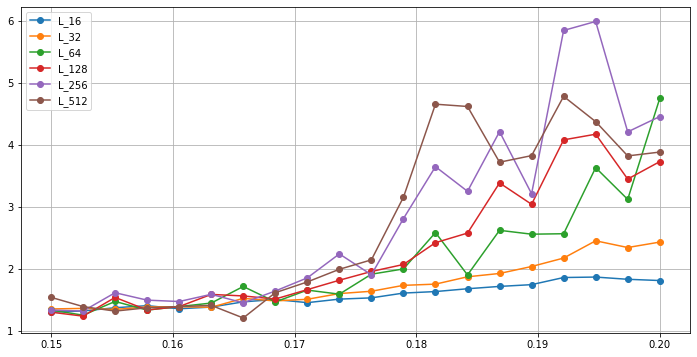

In [108]:
cs = np.linspace(0.15, 0.2, step)
plt.figure(figsize=(12,6))
for pkl_ratio_file in pkl_ratio_files:
    L_array = open_pickle_file(os.path.join(files, pkl_ratio_file))
    U = L_array[2]
    Ro = L_array[3]
    up = U*Ro
    plt.plot(cs, U, 'o-', label=pkl_ratio_file.replace(".pkl", ""))
plt.legend()
plt.grid()
plt.show()

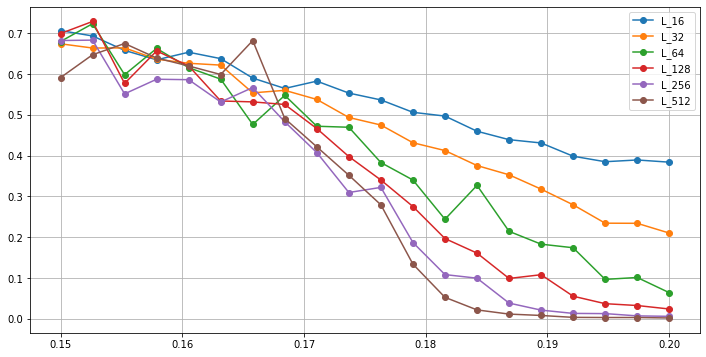

In [109]:
cs = np.linspace(0.15, 0.2, step)
plt.figure(figsize=(12,6))
for pkl_ratio_file in pkl_ratio_files:
    L_array = open_pickle_file(os.path.join(files, pkl_ratio_file))
    U = L_array[2]
    Ro = L_array[3]
    up = U*Ro
    plt.plot(cs, Ro, 'o-', label=pkl_ratio_file.replace(".pkl", ""))
plt.legend()
plt.grid()
plt.show()

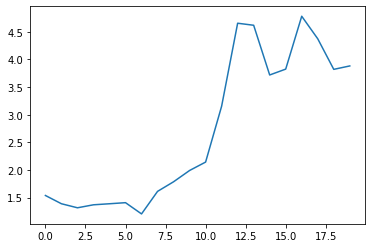

In [101]:
plt.plot(U)